In [1]:
# 범주형 데이터 중 'driving'에 대한 count, percent, cumcount, cumpercent 구하기

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
import scipy.stats
%matplotlib inline
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family ='Malgun Gothic')

# [실습] 기술통계분석 시내, 고속도로 연비 통계치 구하기

In [37]:
ds_mycars = pd.read_csv("/home/piai/bigdata/data/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [38]:
df = ds_mycars[['mpg','highway_mileage']]
df.head()
df.groupby('mpg').describe().round(3)

highway_mileage                                               
              count    mean    std   min    25%   50%    75%   max
mpg                                                               
9               5.0  12.000  0.000  12.0  12.00  12.0  12.00  12.0
11             20.0  15.550  0.999  14.0  15.00  15.0  16.25  17.0
12              8.0  17.375  0.916  16.0  16.75  18.0  18.00  18.0
13             21.0  17.429  0.926  16.0  17.00  17.0  18.00  19.0
14             19.0  18.105  1.286  17.0  17.00  17.0  19.00  20.0
15             24.0  20.875  2.610  17.0  19.00  20.5  23.00  25.0
16             19.0  23.368  2.241  20.0  22.00  23.0  25.50  26.0
17             16.0  24.500  1.366  22.0  24.00  24.0  25.25  27.0
18             26.0  26.192  1.443  23.0  26.00  26.0  26.75  29.0
19             20.0  26.450  1.146  25.0  26.00  26.0  27.00  29.0
20             11.0  27.545  1.572  25.0  27.00  27.0  28.00  31.0
21             23.0  29.130  1.254  26.0  29.00  29.0  29.50  31.0
22              4.0  29.750  0.957  29.0  29.00  29.5  30.25  31.0
23              3.0  30.667  1.528  29.0  30.00  31.0  31.50  32.0
24              5.0  32.600  2.191  30.0  32.00  32.0  33.00  36.0
25              2.0  34.000  2.828  32.0  33.00  34.0  35.00  36.0
26              3.0  34.667  0.577  34.0  34.50  35.0  35.00  35.0
28              2.0  35.000  2.828  33.0  34.00  35.0  36.00  37.0
29              1.0  41.000    NaN  41.0  41.00  41.0  41.00  41.0
33              1.0  44.000    NaN  44.0  44.00  44.0  44.00  44.0
35              1.0  44.000    NaN  44.0  44.00  44.0  44.00  44.0

In [39]:
df.groupby('highway_mileage').describe().round(3)

mpg                                               
                count    mean    std   min    25%   50%    75%   max
highway_mileage                                                     
12                5.0   9.000  0.000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857  0.900  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161  1.186  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800  1.033  12.0  12.00  12.5  13.00  15.0
19               13.0  14.077  0.862  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000  0.894  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000  0.000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857  0.900  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000  1.000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692  0.947  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333  1.676  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000  1.191  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214  1.188  17.0  18.25  19.0  20.00  21.0
28                7.0  19.286  0.756  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636  1.293  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000  1.414  21.0  21.00  21.5  22.50  24.0
31                7.0  21.286  0.951  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000  0.816  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000  2.828  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000    NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000  0.000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500  0.707  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000    NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000    NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000  1.414  33.0  33.50  34.0  34.50  35.0

# [실습] 기술통계 구동에 따른 count.cumcnt,percent,cumpct구하기

In [40]:

ds_mycars = pd.read_csv("/home/piai/bigdata/data/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [41]:
df = ds_mycars[['driving','mpg']]

In [42]:
count = df['driving'].value_counts().sort_index()
count

4    103
f    106
r     25
Name: driving, dtype: int64

In [43]:
percent = count / sum(count) * 100
percent

4    44.017094
f    45.299145
r    10.683761
Name: driving, dtype: float64

In [44]:
cumcnt = np.cumsum(count)
cumcnt

4    103
f    209
r    234
Name: driving, dtype: int64

In [45]:
cumpct = np.cumsum(percent)
cumpct

4     44.017094
f     89.316239
r    100.000000
Name: driving, dtype: float64

In [46]:
count_data = pd.DataFrame({'Count':count, 'Percent':percent,
                          'CumCnt': cumcnt, 'CumPct':cumpct})

count_data.columns.name = 'Flaws'

count_data

Flaws,Count,Percent,CumCnt,CumPct
4,103,44.017094,103,44.017094
f,106,45.299145,209,89.316239
r,25,10.683761,234,100.000000


# [실습] 정규분포의 확률계산 남성 성인 키

In [53]:
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x,mu,sigma)

print("키가 180cm 일 경우 {0:.1f}%에 속한다".format((1-prob)*100))

키가 180cm 일 경우 15.9%에 속한다


# [실습] 정규분포의 확률계산 주행거리

In [57]:
#1) 1리터를 가지고 9km 이상 15km이하를 달릴 확률
#2) 1리터를 가지고 15KM 이상 달릴 확률
mu = 12
sigma =3
x1=9
x2=15

prob1=stats.norm.cdf(x1,mu,sigma)
prob2=stats.norm.cdf(x2,mu,sigma)

print("9KM 이상 15KM 이하 달릴 확률:",(prob2-prob1))
print("15KM 이상 달릴 확률:",(1-prob))

9KM 이상 15KM 이하 달릴 확률: 0.6826894921370859
15KM 이상 달릴 확률: 0.15865525393145707


# [실습] t분포

In [58]:
t = 2.0
df = 100
prob = stats.t.cdf(t,df)
print("P(T<=t):{:.3f}".format(prob))

P(T<=t):0.976


# [실습] 카이제곱 분포

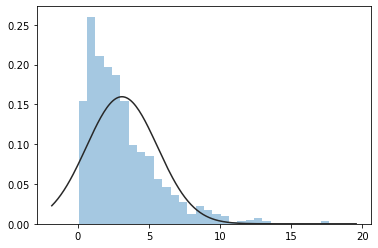

In [62]:
np.random.seed(seed=1234)

chisq_df3=np.random.chisquare(df=3,size=1000)
chisq_df50=np.random.chisquare(df=50,size=1000)
sns.distplot(chisq_df3,fit = stats.norm,kde = False)

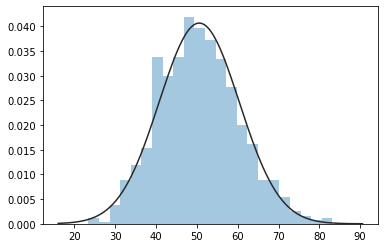

In [63]:
sns.distplot(chisq_df50,fit = stats.norm,kde = False)

# [실습] 카이제곱 분포

In [65]:
chisq =3.0
df=8
prob = stats.chi2.cdf(chisq,df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

P(X<=3.0):0.0656


# [실습] F 분포

In [66]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.850
